# Importing python libraries

In [1]:
import numpy as np #for numerical computations
import pandas as pd #for reading the dataset
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for interactive visualizations

Importing the dataset

In [2]:
dataset = pd.read_excel('Customers2.xlsx')

# exploring the dataset

In [3]:
dataset.info

<bound method DataFrame.info of      CustomerID  NumCalls  NumEmails  NumDownloads  NumEvents  NumForms  \
0             1        33         19             1          0         1   
1             2         0          1             0          1         0   
2             3         4          6             2          0         0   
3             4         0         10             0          0         1   
4             5         7          0             0          0         0   
5             6        10          1             0          1         0   
6             7         5          0             0          0         0   
7             8         1          0             0          0         0   
8             9        26          0             0          0         0   
9            10        11          0             0          0         0   
10           11        30          0             0          0         0   
11           12        10          0             0          0       

In [4]:
dataset.shape

(753, 12)

In [5]:
#getting top 10 entries in dataset
dataset.head(10)

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
0,1,33,19,1,0,1,German,Germany,10.0,0.0,Yes,No
1,2,0,1,0,1,0,English,USA,61.0,0.0,No,No
2,3,4,6,2,0,0,Spanish,Mexico,1.0,0.0,No,No
3,4,0,10,0,0,1,English,India,26.0,0.0,No,No
4,5,7,0,0,0,0,English,USA,11.0,0.0,No,Yes
5,6,10,1,0,1,0,English,USA,30.0,0.0,Yes,No
6,7,5,0,0,0,0,English,USA,10.0,0.0,No,No
7,8,1,0,0,0,0,English,USA,4.0,0.0,No,No
8,9,26,0,0,0,0,English,India,15.0,0.0,No,Yes
9,10,11,0,0,0,0,Spanish,Spain,15.0,0.0,Yes,Yes


In [6]:
#getting last 10 entries in dataset
dataset.tail(10)

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
743,744,0,0,1,2,0,Japanese,Japan,0.0,0.0,Yes,No
744,745,10,0,0,0,0,English,USA,0.0,0.0,No,Yes
745,746,0,1,0,0,0,English,France,0.0,0.0,Yes,Yes
746,747,9,1,0,0,0,English,USA,0.0,1.0,No,Yes
747,748,27,0,0,0,0,English,USA,0.0,0.0,No,Yes
748,749,3,0,0,0,0,German,Canada,0.0,0.0,No,Yes
749,750,0,4,0,0,0,German,Canada,0.0,0.0,No,Yes
750,751,15,0,0,0,0,English,India,0.0,0.0,No,Yes
751,752,0,1,0,0,0,Spanish,Colombia,0.0,0.0,Yes,Yes
752,753,20,0,0,0,0,German,Switzerland,0.0,0.0,Yes,Yes


In [7]:
dataset.describe

<bound method NDFrame.describe of      CustomerID  NumCalls  NumEmails  NumDownloads  NumEvents  NumForms  \
0             1        33         19             1          0         1   
1             2         0          1             0          1         0   
2             3         4          6             2          0         0   
3             4         0         10             0          0         1   
4             5         7          0             0          0         0   
5             6        10          1             0          1         0   
6             7         5          0             0          0         0   
7             8         1          0             0          0         0   
8             9        26          0             0          0         0   
9            10        11          0             0          0         0   
10           11        30          0             0          0         0   
11           12        10          0             0          0     

In [8]:
#checking for missing/null values
null_columns=dataset.columns[dataset.isnull().any()]
#taking care of null values
dataset.fillna(0,inplace=True)


# Data Preprocessing & Visualization

plotting histogram of frequency of 'NumCalls' column with range (0-19) (20-39) and so on



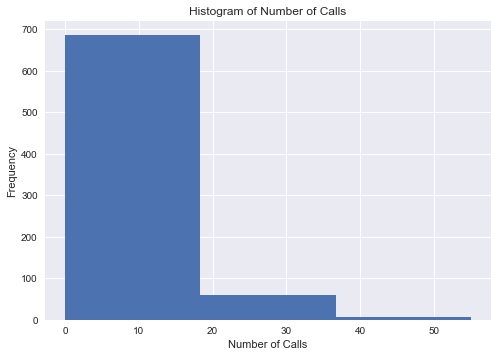

In [9]:
plt.style.use('seaborn')
plt.hist(dataset['NumCalls'] , bins=3)
plt.xlabel('Number of Calls')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Calls')
plt.show()

plotting a bar graph of 'Country' column

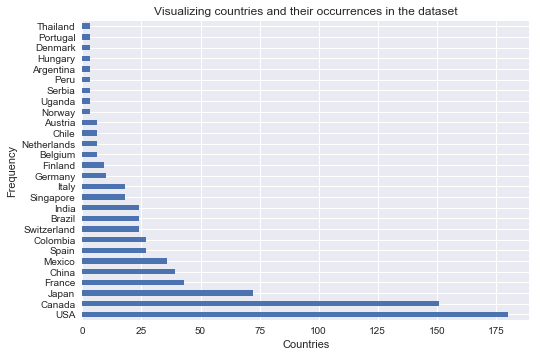

In [10]:
dataset['Country'].value_counts().plot(kind='barh')
plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.title('Visualizing countries and their occurrences in the dataset')
plt.show()

adding a new column 'TotalInteractions' to the dataset that contains sum of the columns NumCalls, NumEmails, NumDownloads, NumEvents, and NumForms

In [11]:
dataset['TotalInteractions'] = dataset['NumCalls'] + dataset['NumEmails'] + dataset['NumDownloads'] + dataset['NumEvents'] + dataset['NumForms']

In [12]:
dataset.shape

(753, 13)

In [13]:
#rearranging the columns
mid = dataset['TotalInteractions']
dataset.drop(labels=['TotalInteractions'], axis=1, inplace = True)
dataset.insert(6, 'TotalInteractions', mid)

In [14]:
dataset.head(5)

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,TotalInteractions,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
0,1,33,19,1,0,1,54,German,Germany,10.0,0.0,Yes,No
1,2,0,1,0,1,0,2,English,USA,61.0,0.0,No,No
2,3,4,6,2,0,0,12,Spanish,Mexico,1.0,0.0,No,No
3,4,0,10,0,0,1,11,English,India,26.0,0.0,No,No
4,5,7,0,0,0,0,7,English,USA,11.0,0.0,No,Yes


Modifying the 'Country' column

In [15]:
#first we create dummy variables
top = ['USA', 'China', 'Japan', 'France', 'Canada']
dataset['Country'] = dataset['Country'].apply(lambda x : 'Other' if x not in top else x)
df1 = pd.get_dummies(dataset['Country'])

In [16]:
dataset['Country'].value_counts()

Other     268
USA       180
Canada    151
Japan      72
France     43
China      39
Name: Country, dtype: int64

In [17]:
#merging dataset and df1
dataset =pd.concat([dataset,df1],axis=1)

In [18]:
#we dont need 'Country' column anymore, hence we drop it
dataset.drop(['Country'],axis=1,inplace=True)

In [19]:
dataset.head(5)

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,TotalInteractions,Language,WebVisits,PageVisits,PriorClient,MadeAPurchase,Canada,China,France,Japan,Other,USA
0,1,33,19,1,0,1,54,German,10.0,0.0,Yes,No,0,0,0,0,1,0
1,2,0,1,0,1,0,2,English,61.0,0.0,No,No,0,0,0,0,0,1
2,3,4,6,2,0,0,12,Spanish,1.0,0.0,No,No,0,0,0,0,1,0
3,4,0,10,0,0,1,11,English,26.0,0.0,No,No,0,0,0,0,1,0
4,5,7,0,0,0,0,7,English,11.0,0.0,No,Yes,0,0,0,0,0,1


Now, we perform label encoding on 'PriorClient' and 'MadeAPurchase' Column

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['PriorClient'] = le.fit_transform(dataset['PriorClient'])
dataset['MadeAPurchase'] = le.fit_transform(dataset['MadeAPurchase'])

In [21]:
dataset.shape

(753, 18)

# Preparing Training and Validation Sets 

The columns for our interest for preparing X(input features) are :
TotalInteractions
WebVisits
PageVisits
PriorClient
dummy variables of 'Country' and 'Language' columns

The column for y(output vector) is :
MadeAPurchase

In [22]:
X = dataset.iloc[:, [6,8,9,10,12,13,14,15,16,17]].values
y = dataset.iloc[:, 11].values

In [23]:
X.shape

(753, 10)

In [24]:
y.shape

(753,)

In [25]:
# Splitting the dataset into the Training set and validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
X_train.shape

(602, 10)

In [27]:
y_train.shape

(602,)

In [28]:
X_val.shape

(151, 10)

In [29]:
y_val.shape

(151,)

# Model Training 

we implement random forest classifier from the sklearn library for our dataset

In [30]:
#applying random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

C:\Users\KUSH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [31]:
# Predicting the Validation set results
y_pred = rf.predict(X_val)

In [32]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val ,y_pred)

In [33]:
cm

array([[37, 21],
       [16, 77]], dtype=int64)

In [34]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_val, y_pred)
average_precision

0.7564978993092644

In [51]:
#plotting roc curve
from sklearn.metrics import roc_auc_score, roc_curve
rf_roc_auc = roc_auc_score(y_val,y_pred)
fpr , tpr , threshold = roc_curve(y_val,rf.predict_proba(X_val)[:,1])

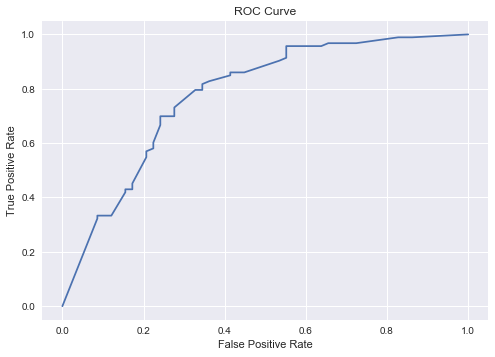

In [52]:
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Model-Tuning (ensemble learning)

here, we perform ensemble learning in an attempt to increase model's accuracy. We use our random forest classifier as well as KNN and kernelSVM

In [35]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn_1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
# Predicting the Validation set results by knn model
y_pred_1 = knn_1.predict(X_val)

In [37]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
svm_1 = SVC(kernel = 'rbf', random_state = 0)
svm_1.fit(X_train, y_train)

C:\Users\KUSH\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [40]:
# Predicting the Test set results by svm model
y_pred_2 = svm_1.predict(X_val)

Now, we use MaxVoting method of ensemble-learning.
Here, we take majority vote among the classification done by different classifiers(built by us above) over each data point. 

In [44]:
from statistics import mode 
final_pred = np.array([])
for i in range(0,len(X_val)):
    final_pred = np.append(final_pred, mode([y_pred[i], y_pred_1[i], y_pred_2[i]]))

In [45]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
cm_f = confusion_matrix(y_val ,final_pred)

In [46]:
cm_f

array([[21, 37],
       [11, 82]], dtype=int64)

In [47]:
average_precision_f = average_precision_score(y_val, final_pred)
average_precision_f

0.6804197432017028